In [1]:
from modlamp.sequences import Helices
from modlamp.descriptors import *
from modlamp import descriptors
from modlamp.database import query_database
from modlamp.sequences import MixedLibrary
import pandas as pd
import numpy as np
import peptides

In [2]:
hemo = pd.read_csv('hemo-pep.csv', names = ['Peptides', 'hemolytic'])
nhemo = pd.read_csv('non-hemo-pep-noval.csv', names = ['Peptides', 'hemolytic'])

In [3]:
hemo['hemolytic']=hemo['hemolytic'].replace(np.NaN,1)

In [4]:
nhemo['hemolytic']=nhemo['hemolytic'].replace(np.NaN,0)

In [5]:
combine = [hemo,nhemo]
fulldata = pd.concat(combine, axis=0)
fulldata = fulldata.sample(frac=1).reset_index(drop=True)

In [8]:
dir(descriptors)

['BaseDescriptor',
 'GlobalDescriptor',
 'Parallel',
 'PeptideDescriptor',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_charge',
 '_one_arc',
 '_one_autocorr',
 '_one_crosscorr',
 'aa_energies',
 'aa_formulas',
 'aa_weights',
 'count_aas',
 'delayed',
 'load_scale',
 'np',
 'stats',
 'sys']

## Calculating Global Descriptors

isoelectric_point = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.isoelectric_point()
    descriptor = desc.descriptor
    isoelectric_point.append(float(descriptor[0]))
fulldata['Isoelectric Point'] = isoelectric_point

isoelectric_point = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.isoelectric_point()
    descriptor = desc.descriptor
    isoelectric_point.append(float(descriptor[0]))
fulldata['Isoelectric Point'] = isoelectric_point

length = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.length()
    descriptor = desc.descriptor
    length.append(float(descriptor[0]))
fulldata['length'] = length

molweight = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.calculate_MW(amide=True)
    descriptor = desc.descriptor
    molweight.append(float(descriptor[0]))
fulldata['molecular weight'] = molweight

charge = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.calculate_charge(amide=True)    
#amide=True means whether the sequences have an amidated C-terminus
    descriptor = desc.descriptor
    charge.append(float(descriptor[0]))
fulldata['charge'] = charge

charge_density = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.charge_density(amide=True)
    descriptor = desc.descriptor
    charge_density.append(float(descriptor[0]))
fulldata['charge density'] = charge_density

instability_index = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.instability_index()
    descriptor = desc.descriptor
    instability_index.append(float(descriptor[0]))
fulldata['instability index'] = instability_index

aromaticity = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.aromaticity()
    descriptor = desc.descriptor
    aromaticity.append(float(descriptor[0]))
fulldata['aromaticity'] = aromaticity

aliphatic_index = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.aliphatic_index()
    descriptor = desc.descriptor
    aliphatic_index.append(float(descriptor[0]))
fulldata['aliphatic index'] = aliphatic_index

In [9]:
#command to calculate all GlobalDescriptors at once
columns = []
allmatrix = []
for i in fulldata['Peptides']:
    desc = GlobalDescriptor(i)
    desc.calculate_all(amide=True)
    descriptor = desc.descriptor
    allmatrix.append(descriptor)
columns = desc.featurenames

In [10]:
allmatrix = np.array(allmatrix).reshape(len(fulldata),10)

In [11]:
allmatrix

array([[ 1.40000000e+01,  1.63707000e+03,  4.03000000e+00, ...,
         1.67142857e+02, -2.07857143e-01,  5.71428571e-01],
       [ 2.00000000e+01,  2.04647000e+03,  2.03100000e+00, ...,
         1.56500000e+02, -1.02350000e+00,  6.50000000e-01],
       [ 2.40000000e+01,  2.59330000e+03,  3.68000000e+00, ...,
         1.38333333e+02, -1.40541667e+00,  6.66666667e-01],
       ...,
       [ 1.20000000e+01,  1.31056000e+03,  2.02900000e+00, ...,
         1.05833333e+02,  5.14166667e-01,  3.33333333e-01],
       [ 1.20000000e+01,  1.18144000e+03,  9.90000000e-01, ...,
         1.38333333e+02, -1.81166667e+00,  5.83333333e-01],
       [ 1.30000000e+01,  1.62286000e+03,  2.02900000e+00, ...,
         2.23076923e+01,  2.01846154e+00,  2.30769231e-01]])

In [12]:
df = pd.DataFrame(data=allmatrix,columns=columns)

In [13]:
df

,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,HydrophRatio
0,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,0.571429
1,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,0.650000
2,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,0.666667
3,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,0.555556
4,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,0.375000
...,...,...,...,...,...,...,...,...,...,...
2715,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,0.357143
2716,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,0.583333
2717,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,0.333333
2718,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,0.583333


In [14]:
df['Peptides'] = fulldata['Peptides']
df['hemolytic'] = fulldata['hemolytic']

In [15]:
df.insert(0,'Peptides',df.pop('Peptides'))

In [16]:
df

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,HydrophRatio,hemolytic
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,0.571429,1.0
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,0.650000,1.0
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,0.666667,1.0
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,0.555556,1.0
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,0.375000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,0.357143,1.0
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,0.583333,0.0
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,0.333333,0.0
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,0.583333,0.0


## Calculating Peptide Descriptors

In [17]:
auto_corr = []
for i in df['Peptides']:
    desc = PeptideDescriptor(i)
    desc.calculate_autocorr(7)
    descriptor = desc.descriptor
    auto_corr.append(descriptor[0])
df['autocorrelation'] = auto_corr

In [18]:
cross_corr = []
for i in df['Peptides']:
    desc = PeptideDescriptor(i)
    desc.calculate_crosscorr(7)
    descriptor = desc.descriptor
    cross_corr.append(descriptor[0])
df['cross correlation'] = cross_corr

In [19]:
max_moment = []
for i in df['Peptides']:
    desc = PeptideDescriptor(i)
    desc.calculate_moment()
    descriptor = desc.descriptor
    max_moment.append(float(descriptor[0]))
df['max/mean moment'] = max_moment

In [20]:
global_descriptor = []
for i in df['Peptides']:
    desc = PeptideDescriptor(i)
    desc.calculate_global(window=1000, modality='max')
    descriptor = desc.descriptor
    global_descriptor.append(float(descriptor[0]))
df['global descriptor'] = global_descriptor

In [21]:
hydrophobicity = []
for i in df['Peptides']:
    desc = PeptideDescriptor(i, 'kytedoolittle')
    desc.calculate_profile(prof_type='H')
    descriptor = desc.descriptor
    hydrophobicity.append(descriptor[0])
df['hydrophobicity'] = hydrophobicity

In [22]:
#there seems to be an internal problem with this command unrelated to the code
property_arcs = []
for i in df['Peptides']:
    desc = PeptideDescriptor(i, scalename="peparc")
    desc.calculate_arc(modality='mean', append=False)
    descriptor = desc.descriptor
    property_arcs.append(descriptor)
df['property arcs'] = property_arcs

In [23]:
df

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,HydrophRatio,hemolytic,autocorrelation,cross correlation,max/mean moment,global descriptor,hydrophobicity,property arcs
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,0.571429,1.0,"[1.2396642857142859, 0.011230769230769258, -0....","[1.2396642857142859, 0.011230769230769258, -0....",0.354211,0.213571,"[-0.05056122448979592, 0.6445408163265306]","[[100.0, 100.0, 40.0, 0.0, 0.0]]"
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,0.650000,1.0,"[0.9728050000000001, 0.2969368421052632, -0.01...","[0.9728050000000001, 0.2969368421052632, -0.01...",0.440212,0.529500,"[-0.0668226059654631, 1.2041004709576137]","[[180.0, 40.0, 20.0, 0.0, 20.0]]"
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,0.666667,1.0,"[1.0568958333333336, 0.46906086956521736, 0.07...","[1.0568958333333336, 0.46906086956521736, 0.07...",0.290018,0.501250,"[-0.023230134158926732, 0.9919878126689274]","[[206.66666666666666, 53.333333333333336, 26.6..."
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,0.555556,1.0,"[1.101977777777778, -0.26362352941176465, -0.5...","[1.101977777777778, -0.26362352941176465, -0.5...",0.546524,0.216667,"[0.023681318681318682, 0.22573260073260068]","[[200.0, 60.0, 40.0, 0.0, 20.0]]"
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,0.375000,0.0,"[1.2420000000000002, 0.09248000000000003, 0.06...","[1.2420000000000002, 0.09248000000000003, 0.06...",0.283946,0.142500,"[-0.07375757575757577, 0.913896103896104]","[[80.0, 50.0, 20.0, 0.0, 20.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,0.357143,1.0,"[1.4447857142857143, 0.4246615384615385, 0.213...","[1.4447857142857143, 0.4246615384615385, 0.213...",0.283401,-0.271429,"[-0.16263605442176873, 1.0765986394557825]","[[30.0, 80.0, 70.0, 30.0, 30.0]]"
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,0.583333,0.0,"[0.7322000000000001, -0.08527272727272725, -0....","[0.7322000000000001, -0.08527272727272725, -0....",0.318578,0.253333,"[-0.015428571428571429, 0.2748571428571428]","[[100.0, 70.0, 0.0, 40.0, 0.0]]"
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,0.333333,0.0,"[0.9606, -0.18080000000000002, -0.67984, 0.656...","[0.9606, -0.18080000000000002, -0.67984, 0.656...",0.559130,0.130000,"[-0.06604081632653061, 0.42274829931972785]","[[70.0, 100.0, 100.0, 30.0, 30.0]]"
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,0.583333,0.0,"[0.6884083333333334, 0.2976545454545455, 0.131...","[0.6884083333333334, 0.2976545454545455, 0.131...",0.228378,0.599167,"[-0.02142857142857143, 0.6771428571428572]","[[100.0, 30.0, 0.0, 0.0, 30.0]]"


In [24]:
#for this, the documentation mentioned lag as well. Does the dataset need to have
#lagged autocovariance, and if so, how much lag?
autocovariance = []
for i in df['Peptides']:
    desc = peptides.Peptide(i)
    table = peptides.tables.HYDROPHOBICITY['KyteDoolittle']
    descriptor = desc.auto_covariance(table)
    autocovariance.append(descriptor)
df['autocovariance'] = autocovariance

In [25]:
#command to calculate all GlobalDescriptors at once
columns = ['BLOSUM1','BLOSUM2','BLOSUM3','BLOSUM4','BLOSUM5','BLOSUM6','BLOSUM7','BLOSUM8','BLOSUM9','BLOSUM10',]
blosumindices = []
for i in df['Peptides']:
    desc = peptides.Peptide(i)
    x = desc.blosum_indices()
    firstdescription = []
    for j in x:
        firstdescription.append(j)
    blosumindices.append(firstdescription)

In [26]:
blosumindices

[[-0.28071428571428575,
  -0.34214285714285714,
  -0.5542857142857142,
  0.027142857142857142,
  0.11142857142857142,
  0.21428571428571427,
  0.13714285714285715,
  -0.09642857142857145,
  -0.04571428571428571,
  -0.13285714285714287],
 [-0.21300000000000008,
  -0.5309999999999999,
  -0.119,
  0.21700000000000003,
  -0.16399999999999998,
  0.183,
  0.26600000000000007,
  -0.07549999999999998,
  0.16350000000000006,
  0.093],
 [-0.45500000000000007,
  -0.5320833333333334,
  -0.07666666666666669,
  0.027500000000000007,
  -0.022083333333333326,
  0.0004166666666666809,
  0.14625,
  -0.0008333333333333202,
  0.15250000000000002,
  -0.19458333333333333],
 [-0.1127777777777778,
  -0.5222222222222221,
  -0.3705555555555555,
  -0.15500000000000003,
  0.02500000000000001,
  0.10277777777777777,
  0.28777777777777774,
  0.054444444444444434,
  0.11722222222222224,
  0.022222222222222223],
 [-0.11125000000000002,
  -0.12,
  -0.03625000000000002,
  0.059375,
  -0.05437499999999998,
  0.18125,
  

In [27]:
blosumdf = pd.DataFrame(data=blosumindices,columns=columns)

In [28]:
blosumdf

,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10
0,-0.280714,-0.342143,-0.554286,0.027143,0.111429,0.214286,0.137143,-0.096429,-0.045714,-0.132857
1,-0.213000,-0.531000,-0.119000,0.217000,-0.164000,0.183000,0.266000,-0.075500,0.163500,0.093000
2,-0.455000,-0.532083,-0.076667,0.027500,-0.022083,0.000417,0.146250,-0.000833,0.152500,-0.194583
3,-0.112778,-0.522222,-0.370556,-0.155000,0.025000,0.102778,0.287778,0.054444,0.117222,0.022222
4,-0.111250,-0.120000,-0.036250,0.059375,-0.054375,0.181250,0.373750,-0.047500,0.240625,-0.095625
...,...,...,...,...,...,...,...,...,...,...
2715,0.200000,-0.282143,-0.179286,0.097857,0.241429,-0.440000,0.140000,0.013571,-0.003571,0.063571
2716,-0.004167,-0.332500,-0.213333,0.157500,-0.153333,0.182500,-0.159167,0.096667,0.200000,0.072500
2717,0.145000,-0.096667,-0.057500,0.082500,-0.199167,0.032500,0.290000,0.195833,0.067500,-0.027500
2718,-0.189167,-0.446667,0.069167,-0.175833,-0.305000,0.009167,0.443333,0.142500,0.136667,0.039167


In [29]:
newdf = pd.concat([df,blosumdf],axis=1)

In [30]:
newdf

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,-0.280714,-0.342143,-0.554286,0.027143,0.111429,0.214286,0.137143,-0.096429,-0.045714,-0.132857
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,-0.213000,-0.531000,-0.119000,0.217000,-0.164000,0.183000,0.266000,-0.075500,0.163500,0.093000
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,-0.455000,-0.532083,-0.076667,0.027500,-0.022083,0.000417,0.146250,-0.000833,0.152500,-0.194583
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,-0.112778,-0.522222,-0.370556,-0.155000,0.025000,0.102778,0.287778,0.054444,0.117222,0.022222
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,-0.111250,-0.120000,-0.036250,0.059375,-0.054375,0.181250,0.373750,-0.047500,0.240625,-0.095625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.200000,-0.282143,-0.179286,0.097857,0.241429,-0.440000,0.140000,0.013571,-0.003571,0.063571
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,-0.004167,-0.332500,-0.213333,0.157500,-0.153333,0.182500,-0.159167,0.096667,0.200000,0.072500
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0.145000,-0.096667,-0.057500,0.082500,-0.199167,0.032500,0.290000,0.195833,0.067500,-0.027500
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,-0.189167,-0.446667,0.069167,-0.175833,-0.305000,0.009167,0.443333,0.142500,0.136667,0.039167


In [31]:
counts = []
for i in newdf['Peptides']:
    p = peptides.Peptide(i)
    counts.append(p.counts())
counts

[{'A': 1,
  'R': 0,
  'N': 1,
  'D': 0,
  'C': 0,
  'Q': 0,
  'E': 0,
  'G': 0,
  'H': 1,
  'I': 1,
  'L': 4,
  'K': 3,
  'M': 0,
  'F': 1,
  'P': 0,
  'S': 0,
  'T': 1,
  'W': 0,
  'Y': 0,
  'V': 1,
  'O': 0,
  'U': 0,
  'B': 0,
  'Z': 0,
  'J': 0,
  'X': 0},
 {'A': 5,
  'R': 0,
  'N': 2,
  'D': 0,
  'C': 0,
  'Q': 0,
  'E': 0,
  'G': 1,
  'H': 1,
  'I': 5,
  'L': 1,
  'K': 1,
  'M': 0,
  'F': 1,
  'P': 1,
  'S': 0,
  'T': 1,
  'W': 0,
  'Y': 0,
  'V': 1,
  'O': 0,
  'U': 0,
  'B': 0,
  'Z': 0,
  'J': 0,
  'X': 0},
 {'A': 3,
  'R': 0,
  'N': 0,
  'D': 0,
  'C': 2,
  'Q': 0,
  'E': 0,
  'G': 1,
  'H': 0,
  'I': 4,
  'L': 3,
  'K': 3,
  'M': 0,
  'F': 3,
  'P': 2,
  'S': 1,
  'T': 1,
  'W': 0,
  'Y': 0,
  'V': 1,
  'O': 0,
  'U': 0,
  'B': 0,
  'Z': 0,
  'J': 0,
  'X': 0},
 {'A': 2,
  'R': 0,
  'N': 0,
  'D': 0,
  'C': 0,
  'Q': 0,
  'E': 0,
  'G': 1,
  'H': 1,
  'I': 1,
  'L': 3,
  'K': 4,
  'M': 1,
  'F': 0,
  'P': 1,
  'S': 1,
  'T': 0,
  'W': 0,
  'Y': 0,
  'V': 3,
  'O': 0,
  'U': 

In [32]:
dfcount = pd.DataFrame.from_dict(counts)

In [33]:
newdf = pd.concat([newdf,dfcount],axis=1)

In [34]:
newdf

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,T,W,Y,V,O,U,B,Z,J,X
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,1,0,0,1,0,0,0,0,0,0
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,1,0,0,1,0,0,0,0,0,0
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,1,0,0,1,0,0,0,0,0,0
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,0,0,0,3,0,0,0,0,0,0
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,0,0,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0,0,0,2,0,0,0,0,0,0
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,0,0,1,0,0,0,0,0,0,0
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0,0,1,0,0,0,0,0,0,0
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,0,0,0,1,0,0,0,0,0,0


In [35]:
newdf.columns

Index(['Peptides', 'Length', 'MW', 'Charge', 'ChargeDensity', 'pI',
       'InstabilityInd', 'Aromaticity', 'AliphaticInd', 'BomanInd',
       'HydrophRatio', 'hemolytic', 'autocorrelation', 'cross correlation',
       'max/mean moment', 'global descriptor', 'hydrophobicity',
       'property arcs', 'autocovariance', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3',
       'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9',
       'BLOSUM10', 'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K',
       'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'O', 'U', 'B', 'Z', 'J', 'X'],
      dtype='object')

In [36]:
crosscovariance = []
for i in newdf['Peptides']:
    peptide = peptides.Peptide(i)
    table1 = peptides.tables.HYDROPHOBICITY["KyteDoolittle"]
    table2 = peptides.tables.HYDROPHOBICITY["Eisenberg"]
    j = peptide.cross_covariance(table1, table2)
    crosscovariance.append(j)
newdf['crosscovariance'] = crosscovariance

In [37]:
newdf['crosscovariance']

0      -0.016691
1       0.298691
2       0.536745
3      -0.197685
4       0.011090
          ...   
2715    0.060491
2716   -0.109031
2717   -0.202034
2718    0.183519
2719   -0.449085
Name: crosscovariance, Length: 2720, dtype: float64

In [38]:
columns = ['pp1','pp2','pp3']
crucianiproperties = []
for i in newdf['Peptides']:
    peptide = peptides.Peptide(i)
    props = peptide.cruciani_properties()
    crucianiprops = []
    for x in props:
        crucianiprops.append(x)
    crucianiproperties.append(crucianiprops)

In [39]:
crucianiproperties

[[-0.2614285714285714, -0.11857142857142856, 0.15785714285714286],
 [-0.5315, -0.358, 0.0945],
 [-0.5783333333333333, -0.22, 0.09500000000000001],
 [-0.42166666666666663, -0.2594444444444444, 0.2544444444444445],
 [-0.29562499999999997, -0.24, 0.198125],
 [0.11000000000000004, 0.42083333333333334, 0.19333333333333336],
 [-0.13266666666666665, -0.15, 0.26399999999999996],
 [-0.576923076923077, -0.2515384615384616, 0.16999999999999998],
 [-0.08384615384615383, 0.27230769230769225, 0.12923076923076923],
 [-0.3384615384615384, -0.3646153846153846, 0.07423076923076923],
 [-0.20285714285714282, -0.35250000000000004, 0.16285714285714287],
 [-0.4556000000000001, -0.44120000000000004, 0.2164],
 [-0.4025, -0.277, 0.296],
 [-0.08917808219178085, -0.2984931506849315, 0.06890410958904108],
 [-0.32935483870967747, -0.415483870967742, 0.18516129032258064],
 [-0.08299999999999999, -0.16599999999999998, 0.331],
 [-0.4511764705882353, -0.24176470588235296, 0.10941176470588235],
 [0.03153846153846153, 0.

In [40]:
cruc = pd.DataFrame(data = crucianiproperties, columns=columns)

In [41]:
cruc

,pp1,pp2,pp3
0,-0.261429,-0.118571,0.157857
1,-0.531500,-0.358000,0.094500
2,-0.578333,-0.220000,0.095000
3,-0.421667,-0.259444,0.254444
4,-0.295625,-0.240000,0.198125
...,...,...,...
2715,-0.055000,-0.205000,0.220000
2716,-0.197500,-0.392500,-0.248333
2717,-0.260833,-0.300833,0.149167
2718,-0.755833,-0.373333,-0.030000


In [42]:
newdf = pd.concat([newdf,cruc],axis=1)

In [43]:
newdf

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,O,U,B,Z,J,X,crosscovariance,pp1,pp2,pp3
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,0,0,0,0,0,0,-0.016691,-0.261429,-0.118571,0.157857
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,0,0,0,0,0,0,0.298691,-0.531500,-0.358000,0.094500
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,0,0,0,0,0,0,0.536745,-0.578333,-0.220000,0.095000
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,0,0,0,0,0,0,-0.197685,-0.421667,-0.259444,0.254444
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,0,0,0,0,0,0,0.011090,-0.295625,-0.240000,0.198125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0,0,0,0,0,0,0.060491,-0.055000,-0.205000,0.220000
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,0,0,0,0,0,0,-0.109031,-0.197500,-0.392500,-0.248333
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0,0,0,0,0,0,-0.202034,-0.260833,-0.300833,0.149167
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,0,0,0,0,0,0,0.183519,-0.755833,-0.373333,-0.030000


In [44]:
columns = ['F1','F2','F3','F4','F5','F6']
fasgaivectors = []
for i in newdf['Peptides']:
    peptide = peptides.Peptide(i)
    fasgai = peptide.fasgai_vectors()
    fasgaivecs = []
    for x in fasgai:
        fasgaivecs.append(x)
    fasgaivectors.append(fasgaivecs)
fas = pd.DataFrame(data = fasgaivectors, columns=columns)

In [45]:
newdf = pd.concat([newdf,fas],axis=1)

In [46]:
newdf

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,crosscovariance,pp1,pp2,pp3,F1,F2,F3,F4,F5,F6
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,-0.016691,-0.261429,-0.118571,0.157857,0.069571,0.535357,0.269286,0.733786,0.061857,0.278429
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,0.298691,-0.531500,-0.358000,0.094500,0.272550,0.159950,-0.117850,0.654150,0.062850,-0.077200
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,0.536745,-0.578333,-0.220000,0.095000,0.375542,0.149208,-0.004208,0.520500,0.226917,0.087500
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,-0.197685,-0.421667,-0.259444,0.254444,-0.249833,0.343778,-0.051056,0.721833,0.163889,0.229333
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,0.011090,-0.295625,-0.240000,0.198125,-0.182000,-0.344812,-0.049000,0.605187,0.039813,0.225563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.060491,-0.055000,-0.205000,0.220000,-0.442071,0.027357,-0.233571,-0.283714,0.402143,0.490786
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,-0.109031,-0.197500,-0.392500,-0.248333,0.067167,0.442000,-0.061583,0.564750,-0.033000,-0.588583
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,-0.202034,-0.260833,-0.300833,0.149167,-0.031250,-0.262667,-0.070750,0.474500,0.032750,-0.189750
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,0.183519,-0.755833,-0.373333,-0.030000,0.152083,-0.189083,-0.252333,0.936083,0.578417,-0.391917


In [47]:
frequencies = []
for i in newdf['Peptides']:
    p = peptides.Peptide(i)
    frequencies.append(p.frequencies())
frequencies



[{'A': 0.07142857142857142,
  'R': 0.0,
  'N': 0.07142857142857142,
  'D': 0.0,
  'C': 0.0,
  'Q': 0.0,
  'E': 0.0,
  'G': 0.0,
  'H': 0.07142857142857142,
  'I': 0.07142857142857142,
  'L': 0.2857142857142857,
  'K': 0.21428571428571427,
  'M': 0.0,
  'F': 0.07142857142857142,
  'P': 0.0,
  'S': 0.0,
  'T': 0.07142857142857142,
  'W': 0.0,
  'Y': 0.0,
  'V': 0.07142857142857142,
  'O': 0.0,
  'U': 0.0,
  'B': 0.0,
  'Z': 0.0,
  'J': 0.0,
  'X': 0.0},
 {'A': 0.25,
  'R': 0.0,
  'N': 0.1,
  'D': 0.0,
  'C': 0.0,
  'Q': 0.0,
  'E': 0.0,
  'G': 0.05,
  'H': 0.05,
  'I': 0.25,
  'L': 0.05,
  'K': 0.05,
  'M': 0.0,
  'F': 0.05,
  'P': 0.05,
  'S': 0.0,
  'T': 0.05,
  'W': 0.0,
  'Y': 0.0,
  'V': 0.05,
  'O': 0.0,
  'U': 0.0,
  'B': 0.0,
  'Z': 0.0,
  'J': 0.0,
  'X': 0.0},
 {'A': 0.125,
  'R': 0.0,
  'N': 0.0,
  'D': 0.0,
  'C': 0.08333333333333333,
  'Q': 0.0,
  'E': 0.0,
  'G': 0.041666666666666664,
  'H': 0.0,
  'I': 0.16666666666666666,
  'L': 0.125,
  'K': 0.125,
  'M': 0.0,
  'F': 0.1

In [48]:
dffrequent = pd.DataFrame.from_dict(frequencies)

In [49]:
dffrequent
suffix = 'freq'
dffrequent = dffrequent.add_suffix(suffix)

In [50]:
dffrequent

,Afreq,Rfreq,Nfreq,Dfreq,Cfreq,Qfreq,Efreq,Gfreq,Hfreq,Ifreq,...,Tfreq,Wfreq,Yfreq,Vfreq,Ofreq,Ufreq,Bfreq,Zfreq,Jfreq,Xfreq
0,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,...,0.071429,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
1,0.250000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.250000,...,0.050000,0.000000,0.000000,0.050000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.125000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.166667,...,0.041667,0.000000,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.055556,...,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0
4,0.062500,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.071429,0.000000,0.142857,0.071429,...,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
2716,0.250000,0.000000,0.083333,0.166667,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,...,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2717,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.166667,0.083333,0.166667,...,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2718,0.166667,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
newdf = pd.concat([newdf,dffrequent],axis=1)

In [52]:
newdf

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,Tfreq,Wfreq,Yfreq,Vfreq,Ofreq,Ufreq,Bfreq,Zfreq,Jfreq,Xfreq
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,0.071429,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,0.050000,0.000000,0.000000,0.050000,0.0,0.0,0.0,0.0,0.0,0.0
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,0.041667,0.000000,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,0.000000,0.000000,0.125000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
hydprofile = []
for i in newdf['Peptides']:
    peptide = peptides.Peptide(i)
    h = peptide.hydrophobicity_profile(window=12, scale="Eisenberg")
    hydprofile.append(h)
newdf['hydprofile'] = hydprofile

In [54]:
newdf

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,Wfreq,Yfreq,Vfreq,Ofreq,Ufreq,Bfreq,Zfreq,Jfreq,Xfreq,hydprofile
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,"[0.028333334252238274, 0.17666666209697723, 0...."
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,0.000000,0.000000,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,"[0.746666669845581, 0.746666669845581, 0.56666..."
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,0.000000,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,"[0.7858333587646484, 0.7749999761581421, 0.696..."
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,"[0.17499999701976776, 0.22499999403953552, 0.2..."
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,0.000000,0.125000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,"[0.3933333456516266, 0.3383333384990692, 0.224..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,"[0.009166666306555271, -0.2916666567325592, -0..."
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,[0.24500000476837158]
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,[0.12333333492279053]
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,[0.5866666436195374]


In [55]:
newdf.to_csv('peptide_features3.csv', index=False)

In [56]:
data = newdf

## Auto Correlation

In [57]:
auto_corr = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    table = peptides.tables.HYDROPHOBICITY['KyteDoolittle']
    descriptor = peptide.auto_correlation(table = table)
    auto_corr.append(descriptor)
data['autocorrelation'] = auto_corr

## Cross Covariance

In [58]:
cross_covariance = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    table1 = peptides.tables.HYDROPHOBICITY['KyteDoolittle']
    table2 = peptides.tables.HYDROPHOBICITY['Eisenberg']
    descriptor = peptide.cross_covariance(table1, table2)
    cross_covariance.append(descriptor)
data['cross covariance'] = cross_covariance

## Hydrophobicity (Aboderin and Abraham Leo Scale)

In [59]:
AboderinHydrophobicity = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    descriptor = peptide.hydrophobicity(scale="Aboderin")
    AboderinHydrophobicity.append(descriptor)
data['AboderinHydrophobicity'] = AboderinHydrophobicity

AbrahamLeoHydrophobicity = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    descriptor = peptide.hydrophobicity(scale="AbrahamLeo")
    AbrahamLeoHydrophobicity.append(descriptor)
data['AbrahamLeoHydrophobicity'] = AbrahamLeoHydrophobicity

## Kidera Factors

In [60]:
KideraFactors = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    facs = []
    for i in peptide.kidera_factors():
        facs.append(i)
    KideraFactors.append(facs)

In [61]:
KideraFactors
columns = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10']
Kidera = pd.DataFrame(data=KideraFactors, columns = columns)

In [62]:
combine = [data, Kidera]
pepdat = pd.concat(combine, axis=1)

In [63]:
pepdat

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,-0.530714,0.046429,0.118571,-0.032143,0.240000,-0.988571,0.297143,-0.081429,0.296429,0.254286
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,-0.406500,-0.533500,0.231000,-0.240500,-0.139500,-0.382000,-0.180500,0.215500,0.371000,-0.551000
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,-0.259167,-0.297500,0.147500,-0.395417,-0.028750,-0.536667,0.277500,-0.136667,0.350000,-0.107500
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,-0.446111,-0.278889,0.133889,0.002778,0.443889,-0.836111,0.065556,-0.143333,-0.161111,0.347222
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,0.330000,-0.256250,0.342500,-0.118125,-0.235000,-0.606875,-0.078750,-0.008125,-0.201875,0.319375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.056429,-0.036429,0.355000,0.172857,0.045714,0.258571,-0.135000,-0.431429,0.314286,0.466429
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,-0.555000,-0.319167,-0.509167,-0.122500,-0.450000,-0.375000,-0.220833,0.203333,0.261667,-0.084167
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0.149167,-0.235000,-0.063333,-0.004167,0.190833,-0.516667,0.055000,0.367500,0.023333,0.132500
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,-0.051667,-0.617500,-0.305833,-0.532500,0.022500,-0.821667,0.513333,-0.155833,0.095833,0.005833


## MSWHIM Scores

In [64]:
mswhim = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    scores = []
    for i in peptide.ms_whim_scores():
        scores.append(i)
    mswhim.append(scores)

In [65]:
mswhim
columns = ['mswhim1', 'mswhim2', 'mswhim3']


In [66]:
mswhimscores = pd.DataFrame(data=mswhim, columns = columns)
combine = [pepdat, mswhimscores]
fulldata = pd.concat(combine, axis=1)

In [67]:
fulldata

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,K4,K5,K6,K7,K8,K9,K10,mswhim1,mswhim2,mswhim3
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,-0.032143,0.240000,-0.988571,0.297143,-0.081429,0.296429,0.254286,-0.426429,0.536429,-0.211429
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,-0.240500,-0.139500,-0.382000,-0.180500,0.215500,0.371000,-0.551000,-0.494500,0.498000,-0.458500
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,-0.395417,-0.028750,-0.536667,0.277500,-0.136667,0.350000,-0.107500,-0.507083,0.534167,-0.313333
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,0.002778,0.443889,-0.836111,0.065556,-0.143333,-0.161111,0.347222,-0.612778,0.489444,-0.264444
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,-0.118125,-0.235000,-0.606875,-0.078750,-0.008125,-0.201875,0.319375,-0.337500,0.495625,-0.366250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.172857,0.045714,0.258571,-0.135000,-0.431429,0.314286,0.466429,-0.351429,0.469286,-0.225000
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,-0.122500,-0.450000,-0.375000,-0.220833,0.203333,0.261667,-0.084167,-0.309167,0.195000,-0.460833
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,-0.004167,0.190833,-0.516667,0.055000,0.367500,0.023333,0.132500,-0.286667,0.270000,-0.340000
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,-0.532500,0.022500,-0.821667,0.513333,-0.155833,0.095833,0.005833,-0.425000,0.508333,-0.470000


## PCP Descriptors

In [68]:
pcp = []
for i in data['Peptides']:
    peptide = peptides.Peptide(i)
    descriptors = []
    for i in peptide.pcp_descriptors():
        descriptors.append(i)
    pcp.append(descriptors)
pcp

[[-0.06721428571428571,
  -0.04421428571428571,
  -0.12335714285714287,
  -0.15978571428571428,
  0.02685714285714285],
 [-0.068, 0.08555, -0.12979999999999997, -0.089, 0.02714999999999999],
 [-0.08975,
  0.06904166666666667,
  -0.07395833333333333,
  -0.09908333333333334,
  0.026374999999999996],
 [-0.03411111111111112,
  0.011833333333333328,
  -0.12866666666666668,
  -0.14705555555555558,
  0.012111111111111105],
 [-0.0085625,
  0.10668750000000002,
  0.0044375000000000005,
  -0.1295,
  -0.04368750000000001],
 [-0.09324999999999999,
  -0.13841666666666666,
  0.13033333333333336,
  -0.13425,
  -0.07166666666666666],
 [-0.01666666666666666,
  -0.05446666666666668,
  -0.06833333333333333,
  -0.10573333333333332,
  -0.007066666666666671],
 [-0.0566923076923077,
  0.045461538461538456,
  -0.21576923076923077,
  -0.16838461538461538,
  0.12592307692307692],
 [-0.045538461538461535,
  -0.07192307692307692,
  0.16992307692307693,
  -0.1710769230769231,
  -0.04907692307692307],
 [-0.00219230

In [69]:
columns = ['E1', 'E2', 'E3', 'E4', 'E5']
pcpdesc = pd.DataFrame(data=pcp, columns = columns)
combine = [fulldata, pcpdesc]
fulldata = pd.concat(combine, axis=1)

In [70]:
fulldata

,Peptides,Length,MW,Charge,ChargeDensity,pI,InstabilityInd,Aromaticity,AliphaticInd,BomanInd,...,K9,K10,mswhim1,mswhim2,mswhim3,E1,E2,E3,E4,E5
0,HFLLTKVNLAKKIL,14.0,1637.07,4.030,0.002462,13.078125,3.507143,0.071429,167.142857,-0.207857,...,0.296429,0.254286,-0.426429,0.536429,-0.211429,-0.067214,-0.044214,-0.123357,-0.159786,0.026857
1,IIGAIAAALPHVINAIKNTF,20.0,2046.47,2.031,0.000992,12.843750,12.565000,0.050000,156.500000,-1.023500,...,0.371000,-0.551000,-0.494500,0.498000,-0.458500,-0.068000,0.085550,-0.129800,-0.089000,0.027150
2,FLPLIAGVAASILPKIFCFITKKC,24.0,2593.30,3.680,0.001419,10.427734,30.120833,0.125000,138.333333,-1.405417,...,0.350000,-0.107500,-0.507083,0.534167,-0.313333,-0.089750,0.069042,-0.073958,-0.099083,0.026375
3,GMASKLAKVLPHVVKLIK,18.0,1931.49,5.029,0.002604,13.140625,6.533333,0.000000,146.111111,-0.469444,...,-0.161111,0.347222,-0.612778,0.489444,-0.264444,-0.034111,0.011833,-0.128667,-0.147056,0.012111
4,GFLYVASGPLVRSSYR,16.0,1771.04,2.986,0.001686,11.123047,38.306250,0.187500,91.250000,0.983125,...,-0.201875,0.319375,-0.337500,0.495625,-0.366250,-0.008563,0.106688,0.004438,-0.129500,-0.043688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,VHVPPICSHRECRK,14.0,1659.99,2.765,0.001666,10.037109,68.185714,0.000000,69.285714,2.811429,...,0.314286,0.466429,-0.351429,0.469286,-0.225000,0.016571,-0.013857,0.029571,-0.005643,-0.098214
2716,AINDLLDAEYMA,12.0,1337.51,-2.011,-0.001504,3.537109,56.066667,0.083333,122.500000,0.707500,...,0.261667,-0.084167,-0.309167,0.195000,-0.460833,-0.013417,-0.003750,-0.166583,0.007500,0.116167
2717,GIHDILKYGKPA,12.0,1310.56,2.029,0.001548,10.239746,16.966667,0.083333,105.833333,0.514167,...,0.023333,0.132500,-0.286667,0.270000,-0.340000,0.026250,0.061250,-0.016083,-0.093583,0.063250
2718,FAGPLGVLQPLA,12.0,1181.44,0.990,0.000838,12.250000,52.383333,0.083333,138.333333,-1.811667,...,0.095833,0.005833,-0.425000,0.508333,-0.470000,-0.038083,0.162250,-0.093667,-0.121417,0.146417


In [71]:
PepNames = fulldata['Peptides']

In [72]:
fulldata = fulldata.drop(columns = 'Peptides')

In [73]:
hemolytic = fulldata['hemolytic']

In [74]:
fulldata['hemolytic'] = hemolytic

In [75]:
fulldata = fulldata.sample(frac=1).reset_index(drop=True)

In [76]:
fulldata.to_csv('peptide_features4.csv', index=False)

In [77]:
from featurewiz import featurewiz

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [78]:
fulldata['hydprofile']

0                 [0.6324999928474426, 0.621666669845581]
1       [-0.1966666728258133, -0.18583333492279053, -0...
2                                                      []
3             [-0.0716666653752327, -0.31166666746139526]
4                                   [0.17249999940395355]
                              ...                        
2715                                                   []
2716    [0.289166659116745, 0.289166659116745, 0.25249...
2717    [0.4300000071525574, 0.5016666650772095, 0.605...
2718    [0.3316666781902313, 0.32083332538604736, 0.30...
2719          [0.25583332777023315, -0.07000000029802322]
Name: hydprofile, Length: 2720, dtype: object

In [79]:
fulldata.columns = fulldata.columns.str.rstrip() 

In [80]:
fulldata['hydprofile']=fulldata['hydprofile'].replace(' ', 'NA')

In [81]:
newdata = fulldata.drop('hydprofile', axis=1)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (2720, 111)
    Loaded train data. Shape = (2720, 111)
    Some column names had special characters which were removed...
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#################################################

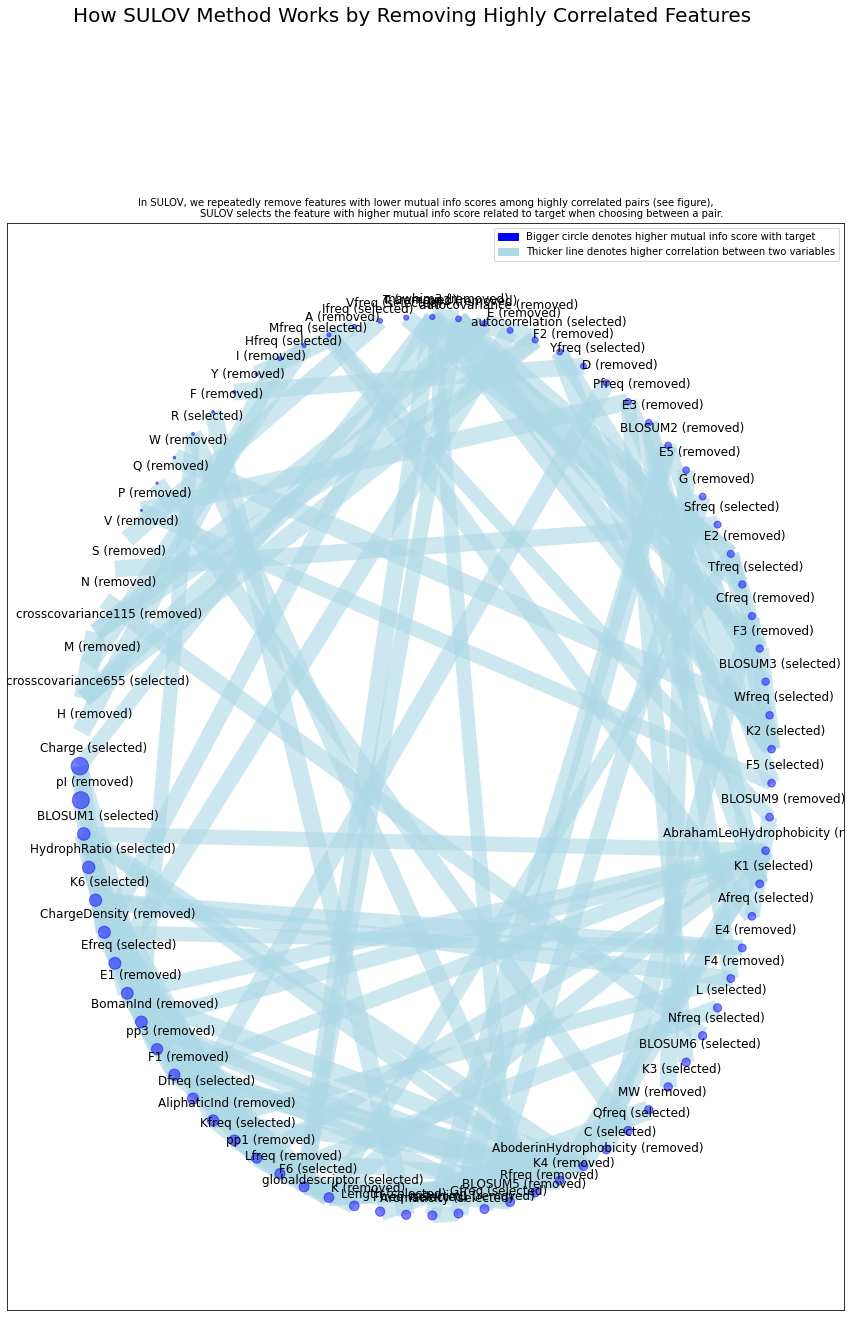

Time taken for SULOV method = 2 seconds
    Adding 0 categorical variables to reduced numeric variables  of 47
Final list of selected vars after SULOV = 47
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 47 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 47 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 38 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 29 variables...
            Time taken for regular XGBoost feature selection

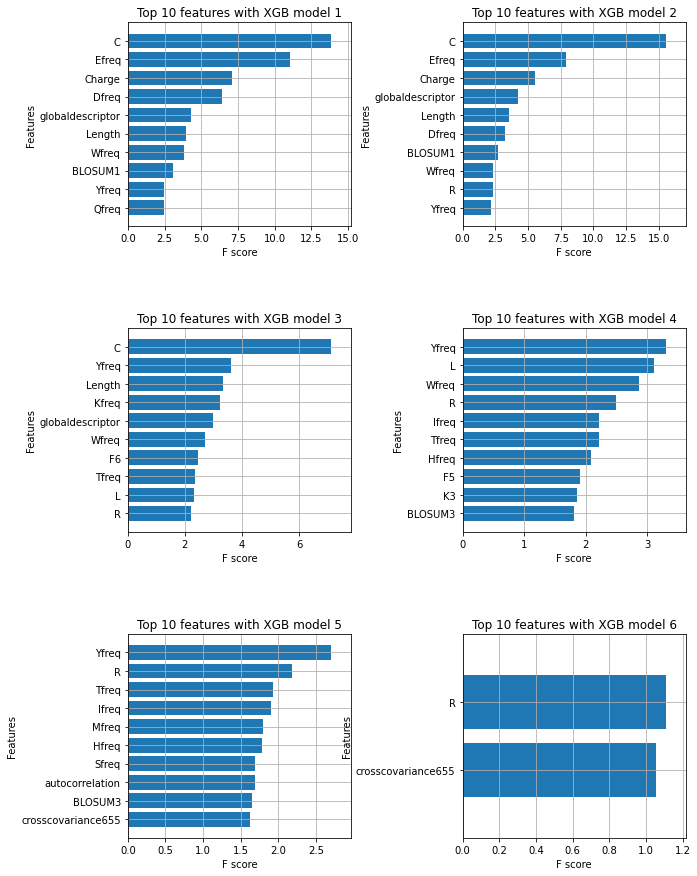

            Total time taken for XGBoost feature selection = 3 seconds
    Alert: No ID variables ['crosscorrelation', 'hydrophobicity', 'propertyarcs'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 32 important features. Too many to print...

    Time taken for feature selection = 5 seconds
Returning 2 dataframes: dataname and test_data with 32 important features.


In [82]:
target = 'hemolytic'
 
features, train = featurewiz(newdata, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [83]:
features

['C',
 'Efreq',
 'Charge',
 'Dfreq',
 'global descriptor',
 'Length',
 'Wfreq',
 'BLOSUM1',
 'Yfreq',
 'Qfreq',
 'Tfreq',
 'max/mean moment',
 'BLOSUM6',
 'Mfreq',
 'R',
 'mswhim2',
 'Kfreq',
 'F6',
 'L',
 'Aromaticity',
 'Nfreq',
 'K3',
 'Ifreq',
 'Hfreq',
 'F5',
 'BLOSUM3',
 'K1',
 'Sfreq',
 'K2',
 'autocorrelation',
 'crosscovariance',
 'Vfreq']

In [84]:
sf4 = newdata[features]

In [85]:
sf4['hemolytic'] = newdata['hemolytic']

In [86]:
sf4

,C,Efreq,Charge,Dfreq,global descriptor,Length,Wfreq,BLOSUM1,Yfreq,Qfreq,...,Hfreq,F5,BLOSUM3,K1,Sfreq,K2,autocorrelation,crosscovariance,Vfreq,hemolytic
0,0,0.000000,1.989,0.0,0.684615,13.0,0.000000,-0.540769,0.000000,0.0,...,0.000000,0.291000,-0.213077,-0.109231,0.076923,-0.296154,0.336744,0.389198,0.000000,1.0
1,0,0.047619,7.031,0.0,-0.362381,21.0,0.047619,0.132381,0.000000,0.0,...,0.047619,0.163048,-0.291429,-0.110476,0.047619,0.227619,0.212749,0.399417,0.000000,0.0
2,2,0.000000,5.679,0.0,-0.334545,11.0,0.363636,-0.252727,0.000000,0.0,...,0.000000,-0.516636,0.345455,-0.023636,0.000000,0.974545,0.696545,0.607372,0.000000,0.0
3,0,0.000000,6.986,0.0,-0.173846,13.0,0.153846,-0.097692,0.000000,0.0,...,0.000000,-0.203923,-0.400000,-0.296923,0.076923,0.581538,-0.136532,-0.300053,0.000000,0.0
4,0,0.000000,4.987,0.0,0.186667,12.0,0.000000,-0.310000,0.000000,0.0,...,0.000000,0.053750,-0.540000,-0.773333,0.000000,0.004167,0.414087,0.473968,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,1,0.181818,-0.164,0.0,0.107273,11.0,0.000000,0.174545,0.000000,0.0,...,0.000000,-0.168273,0.079091,-0.209091,0.090909,-0.488182,-0.431732,-0.332135,0.000000,0.0
2716,0,0.000000,5.987,0.0,0.201667,18.0,0.055556,-0.214444,0.000000,0.0,...,0.000000,0.107722,-0.273889,-0.944444,0.000000,-0.212222,-0.068443,-0.305933,0.000000,1.0
2717,1,0.055556,0.834,0.0,0.300000,18.0,0.055556,-0.395556,0.055556,0.0,...,0.000000,-0.079889,-0.049444,-0.038889,0.166667,-0.056667,0.155143,0.165951,0.055556,0.0
2718,0,0.000000,2.989,0.0,0.461429,14.0,0.000000,-0.520714,0.000000,0.0,...,0.000000,-0.086143,-0.232143,-0.172857,0.000000,-0.164286,0.249179,0.088514,0.071429,1.0


In [88]:
sf4.to_csv('selectedfeatureset4.csv', index=False)

In [121]:
sf5 = newdata[features[0:10]]

In [122]:
sf5['hemolytic'] = newdata['hemolytic']

In [123]:
sf5.to_csv('E:\HEJ\Third Pass\selectedfeatureset55.csv',index=False)

In [108]:
sf5

,C,Efreq,Charge,Dfreq,hemolytic
0,0,0.000000,1.989,0.0,1.0
1,0,0.047619,7.031,0.0,0.0
2,2,0.000000,5.679,0.0,0.0
3,0,0.000000,6.986,0.0,0.0
4,0,0.000000,4.987,0.0,0.0
...,...,...,...,...,...
2715,1,0.181818,-0.164,0.0,0.0
2716,0,0.000000,5.987,0.0,1.0
2717,1,0.055556,0.834,0.0,0.0
2718,0,0.000000,2.989,0.0,1.0


In [89]:
def boostaway(X_train, X_test, y_train, y_test):
    xg_reg = XGBC(disable_default_eval_metric=1)
    xg_reg.fit(X_train,y_train)
    y_pred = xg_reg.predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred,  average = 'macro')*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred, average = 'macro')*100
    print("The Recall Score is", RecallScore)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)
    return y_pred

In [90]:
from xgboost import XGBClassifier as XGBC

In [91]:
boostaway(X_train, X_test, y_train, y_test)

NameError: name 'X_train' is not defined

In [92]:
data = pd.read_csv('selectedfeatureset4.csv')

In [93]:
data

,C,Efreq,Charge,Dfreq,global descriptor,Length,Wfreq,BLOSUM1,Yfreq,Qfreq,...,Hfreq,F5,BLOSUM3,K1,Sfreq,K2,autocorrelation,crosscovariance,Vfreq,hemolytic
0,0,0.000000,1.989,0.0,0.684615,13.0,0.000000,-0.540769,0.000000,0.0,...,0.000000,0.291000,-0.213077,-0.109231,0.076923,-0.296154,0.336744,0.389198,0.000000,1.0
1,0,0.047619,7.031,0.0,-0.362381,21.0,0.047619,0.132381,0.000000,0.0,...,0.047619,0.163048,-0.291429,-0.110476,0.047619,0.227619,0.212749,0.399417,0.000000,0.0
2,2,0.000000,5.679,0.0,-0.334545,11.0,0.363636,-0.252727,0.000000,0.0,...,0.000000,-0.516636,0.345455,-0.023636,0.000000,0.974545,0.696545,0.607372,0.000000,0.0
3,0,0.000000,6.986,0.0,-0.173846,13.0,0.153846,-0.097692,0.000000,0.0,...,0.000000,-0.203923,-0.400000,-0.296923,0.076923,0.581538,-0.136532,-0.300053,0.000000,0.0
4,0,0.000000,4.987,0.0,0.186667,12.0,0.000000,-0.310000,0.000000,0.0,...,0.000000,0.053750,-0.540000,-0.773333,0.000000,0.004167,0.414087,0.473968,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,1,0.181818,-0.164,0.0,0.107273,11.0,0.000000,0.174545,0.000000,0.0,...,0.000000,-0.168273,0.079091,-0.209091,0.090909,-0.488182,-0.431732,-0.332135,0.000000,0.0
2716,0,0.000000,5.987,0.0,0.201667,18.0,0.055556,-0.214444,0.000000,0.0,...,0.000000,0.107722,-0.273889,-0.944444,0.000000,-0.212222,-0.068443,-0.305933,0.000000,1.0
2717,1,0.055556,0.834,0.0,0.300000,18.0,0.055556,-0.395556,0.055556,0.0,...,0.000000,-0.079889,-0.049444,-0.038889,0.166667,-0.056667,0.155143,0.165951,0.055556,0.0
2718,0,0.000000,2.989,0.0,0.461429,14.0,0.000000,-0.520714,0.000000,0.0,...,0.000000,-0.086143,-0.232143,-0.172857,0.000000,-0.164286,0.249179,0.088514,0.071429,1.0


In [94]:
ldata = lda(data)
ldata.to_csv('ldata.csv', index=False)

NameError: name 'lda' is not defined

In [7]:
pdata = pca(data,10)
pdata.to_csv('pdata.csv',index=False)

In [8]:
tdata = tdsne(data,3)
tdata.to_csv('tdata.csv', index=False)

C:\Users\Yousuf\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Yousuf\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [2]:
link = "E:\HEJ\Third Pass\selectedfeatureset4.csv"
pp = pd.read_csv(link)

In [4]:
pp

,C,Efreq,Charge,Dfreq,global descriptor,Length,Wfreq,BLOSUM1,Yfreq,Qfreq,...,Hfreq,F5,BLOSUM3,K1,Sfreq,K2,autocorrelation,crosscovariance,Vfreq,hemolytic
0,0,0.000000,1.989,0.0,0.684615,13.0,0.000000,-0.540769,0.000000,0.0,...,0.000000,0.291000,-0.213077,-0.109231,0.076923,-0.296154,0.336744,0.389198,0.000000,1.0
1,0,0.047619,7.031,0.0,-0.362381,21.0,0.047619,0.132381,0.000000,0.0,...,0.047619,0.163048,-0.291429,-0.110476,0.047619,0.227619,0.212749,0.399417,0.000000,0.0
2,2,0.000000,5.679,0.0,-0.334545,11.0,0.363636,-0.252727,0.000000,0.0,...,0.000000,-0.516636,0.345455,-0.023636,0.000000,0.974545,0.696545,0.607372,0.000000,0.0
3,0,0.000000,6.986,0.0,-0.173846,13.0,0.153846,-0.097692,0.000000,0.0,...,0.000000,-0.203923,-0.400000,-0.296923,0.076923,0.581538,-0.136532,-0.300053,0.000000,0.0
4,0,0.000000,4.987,0.0,0.186667,12.0,0.000000,-0.310000,0.000000,0.0,...,0.000000,0.053750,-0.540000,-0.773333,0.000000,0.004167,0.414087,0.473968,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,1,0.181818,-0.164,0.0,0.107273,11.0,0.000000,0.174545,0.000000,0.0,...,0.000000,-0.168273,0.079091,-0.209091,0.090909,-0.488182,-0.431732,-0.332135,0.000000,0.0
2716,0,0.000000,5.987,0.0,0.201667,18.0,0.055556,-0.214444,0.000000,0.0,...,0.000000,0.107722,-0.273889,-0.944444,0.000000,-0.212222,-0.068443,-0.305933,0.000000,1.0
2717,1,0.055556,0.834,0.0,0.300000,18.0,0.055556,-0.395556,0.055556,0.0,...,0.000000,-0.079889,-0.049444,-0.038889,0.166667,-0.056667,0.155143,0.165951,0.055556,0.0
2718,0,0.000000,2.989,0.0,0.461429,14.0,0.000000,-0.520714,0.000000,0.0,...,0.000000,-0.086143,-0.232143,-0.172857,0.000000,-0.164286,0.249179,0.088514,0.071429,1.0


In [9]:
pp[['BLOSUM1','BLOSUM3','BLOSUM6']]

,BLOSUM1,BLOSUM3,BLOSUM6
0,-0.540769,-0.213077,0.273077
1,0.132381,-0.291429,0.173810
2,-0.252727,0.345455,-0.058182
3,-0.097692,-0.400000,0.215385
4,-0.310000,-0.540000,0.210833
...,...,...,...
2715,0.174545,0.079091,0.289091
2716,-0.214444,-0.273889,0.217778
2717,-0.395556,-0.049444,0.251667
2718,-0.520714,-0.232143,0.411429


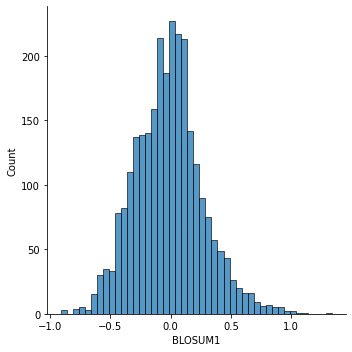

In [12]:
import seaborn as sns
sns.displot(pp['BLOSUM1'])

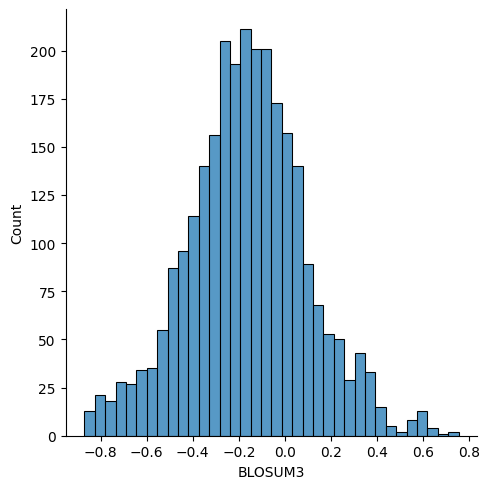

In [13]:
sns.displot(pp['BLOSUM3'])

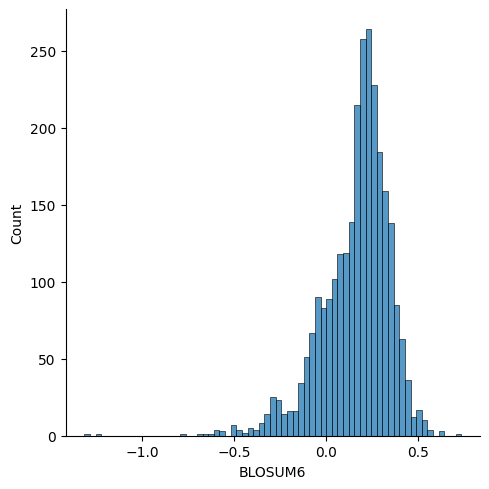

In [14]:
sns.displot(pp['BLOSUM6'])